In [88]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image

import tensorflow as tf

In [87]:
TRAIN_DATASET_PATH = "./dataset/train/"

In [82]:
path = TRAIN_DATASET_PATH + "labels"

dct = {
    "images": [],
    "labels": [],
    "x_center": [],
    "y_center": [],
    "width": [],
    "height": []
}

for image in os.listdir(path):
    label_file = open(path + "/" + image)

    labels_str = label_file.read().split(sep="\n")
    labels_arr = []
    xmin_arr = []
    ymin_arr = []
    xmax_arr = []
    ymax_arr = []
    for label in labels_str:
        label_parts = label.split()
        labels_arr.append(int(label_parts[0]))
        xmin_arr.append(float(label_parts[1]))
        ymin_arr.append(float(label_parts[2]))
        xmax_arr.append(float(label_parts[3]))
        ymax_arr.append(float(label_parts[4]))

    dct["images"].append(image)
    dct["labels"].append(labels_arr)
    dct["x_center"].append(xmin_arr)
    dct["y_center"].append(ymin_arr)
    dct["width"].append(xmax_arr)
    dct["height"].append(ymax_arr)

    label_file.close()

df = pd.DataFrame(dct)
df

,images,labels,x_center,y_center,width,height
0,009000_jpg.rf.8c46e1aa5b46a0ad24ee4bcb2945d22a...,[2],[0.6538461538461539],[0.5420673076923077],[0.0625],[0.06610576923076923]
1,009002_jpg.rf.18bf80f2cfdb51f853da15019f787cef...,[2],[0.5576923076923077],[0.3389423076923077],[0.055288461538461536],[0.07091346153846154]
2,009003_jpg.rf.46963402c4cb6f46a47e508b892c6521...,[2],[0.4230769230769231],[0.3798076923076923],[0.09975961538461539],[0.055288461538461536]
3,009007_jpg.rf.a5143afbb0c741f3b60fc72403fdde6a...,[2],[0.4014423076923077],[0.35096153846153844],[0.055288461538461536],[0.1778846153846154]
4,009012_jpg.rf.bc99877ade8754d2be89119361e7820c...,[2],[0.8040865384615384],[0.3870192307692308],[0.052884615384615384],[0.07211538461538461]
...,...,...,...,...,...,...
6176,042973_jpg.rf.6792837ba2183435721cd7b4e9674ecd...,[1],[0.3485576923076923],[0.3016826923076923],[0.08533653846153846],[0.08653846153846154]
6177,042982_jpg.rf.79a8b11af76f74faa44312da78ee1486...,[4],[0.3629807692307692],[0.5276442307692307],[0.0625],[0.16706730769230768]
6178,042984_jpg.rf.5005cade401420afa36aac4b818e8dfa...,[1],[0.3870192307692308],[0.36778846153846156],[0.04447115384615385],[0.052884615384615384]
6179,042994_jpg.rf.141176d36edf4a11d33dad95a76e61b6...,[1],[0.5084134615384616],[0.5492788461538461],[0.0889423076923077],[0.06370192307692307]


In [155]:
df[df["labels"].isin([[3]])][:30]

,images,labels,x_center,y_center,width,height
1127,019396_jpg.rf.655e8d254f3811afe59698da4eef17c6...,[3],[0.6899038461538461],[0.5901442307692307],[0.040865384615384616],[0.17908653846153846]
1233,020281_jpg.rf.fde6e877f4afd8c93a884a3e6c745034...,[3],[0.5384615384615384],[0.36899038461538464],[0.17908653846153846],[0.06009615384615385]
1980,026021_jpg.rf.20e9c9a3daac0c4899117ce0705ce51a...,[3],[0.6177884615384616],[0.4326923076923077],[0.1971153846153846],[0.11177884615384616]
1981,026022_jpg.rf.bf9e79391ad523087193454dbdb8e7da...,[3],[0.4098557692307692],[0.46634615384615385],[0.04447115384615385],[0.17067307692307693]
1985,026028_jpg.rf.e0101c9b1c6cda3959252077d70a3f8c...,[3],[0.5504807692307693],[0.5336538461538461],[0.08533653846153846],[0.21754807692307693]
1988,026034_jpg.rf.10b7b14cb55e5e34ef92b6cbe4620f60...,[3],[0.5180288461538461],[0.4423076923076923],[0.08533653846153846],[0.22355769230769232]
1989,026039_jpg.rf.9eed785d9c006cb9a466df14b5b14fa8...,[3],[0.46274038461538464],[0.5288461538461539],[0.08774038461538461],[0.19831730769230768]
1992,026053_jpg.rf.1aa918e4dbc21ef571033a5960c453cc...,[3],[0.5685096153846154],[0.6394230769230769],[0.04567307692307692],[0.18389423076923078]
1995,026088_jpg.rf.316b76468a4ec894e917f6b043ac9e42...,[3],[0.39903846153846156],[0.36658653846153844],[0.12620192307692307],[0.07451923076923077]
1997,026094_jpg.rf.f4553c889afaa89c4cc88bb18bccdbec...,[3],[0.5168269230769231],[0.6899038461538461],[0.042067307692307696],[0.18269230769230768]


In [84]:
images_path_df = pd.DataFrame({
    "images": os.listdir(TRAIN_DATASET_PATH + "images")
})

images_path_df

,images
0,009000_jpg.rf.8c46e1aa5b46a0ad24ee4bcb2945d22a...
1,009002_jpg.rf.18bf80f2cfdb51f853da15019f787cef...
2,009003_jpg.rf.46963402c4cb6f46a47e508b892c6521...
3,009007_jpg.rf.a5143afbb0c741f3b60fc72403fdde6a...
4,009012_jpg.rf.bc99877ade8754d2be89119361e7820c...
...,...
6176,042973_jpg.rf.6792837ba2183435721cd7b4e9674ecd...
6177,042982_jpg.rf.79a8b11af76f74faa44312da78ee1486...
6178,042984_jpg.rf.5005cade401420afa36aac4b818e8dfa...
6179,042994_jpg.rf.141176d36edf4a11d33dad95a76e61b6...


3


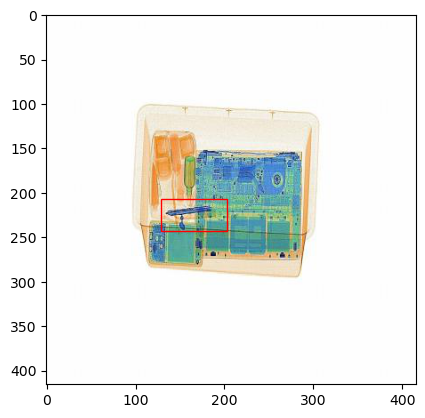

In [160]:
fig, ax = plt.subplots(1)
index = 2048

x_start = df["x_center"][index][0] - df["width"][index][0] / 2
y_start = df["y_center"][index][0] - df["height"][index][0] / 2

rect = patches.Rectangle((x_start * 416, y_start * 416), df["width"][index][0] * 416, df["height"][index][0] * 416, edgecolor="red", facecolor="none")

ax.add_patch(rect)
ax.imshow(Image.open(TRAIN_DATASET_PATH + "images/" + images_path_df["images"][index]))
print(df["labels"][index][0])

plt.show()

1


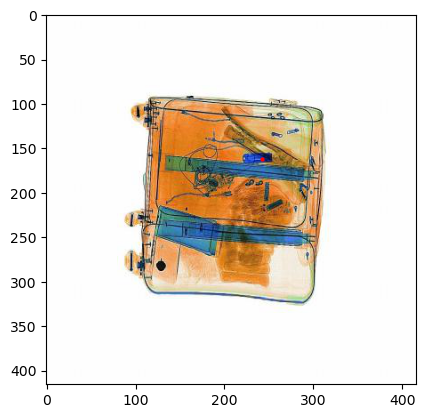

In [106]:
plt.plot(df["x_center"][1993][0] * 416, df["y_center"][1993][0] * 416, marker='o', markersize=2, color="red")
plt.imshow(Image.open(TRAIN_DATASET_PATH + "images/" + images_path_df["images"][1993]))
print(df["labels"][1993][0])